In [2]:
import rasterio

tif_file = rasterio.open('/Users/jonathanlifferth/data/maps/GHS_POP_E2015_GLOBE_R2019A_4326_30ss_V1_0/GHS_POP_E2015_GLOBE_R2019A_4326_30ss_V1_0.tif')
ghs_data = tif_file.read()

In [3]:
import numpy as np

print("Tiff Boundary", tif_file.bounds)
print("Tiff CRS", tif_file.crs)
print("Data shape", ghs_data.shape)
print("Max value", np.amax(ghs_data))
print("Min value", np.amin(ghs_data))

Tiff Boundary BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
Tiff CRS EPSG:4326
Data shape (1, 21600, 43200)
Max value 459434.619140625
Min value -200.0


In [4]:
ghs_data[0][ghs_data[0] < 0.0] = 0.0

In [5]:
from matplotlib import cm
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap, ListedColormap

ourcmap = cm.get_cmap('hot_r', 460)
newcolors = ourcmap(np.linspace(0, 1, 460))
background_colour = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors[:1, :] = background_colour
newcmp = ListedColormap(newcolors)

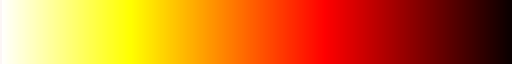

In [9]:
newcmp

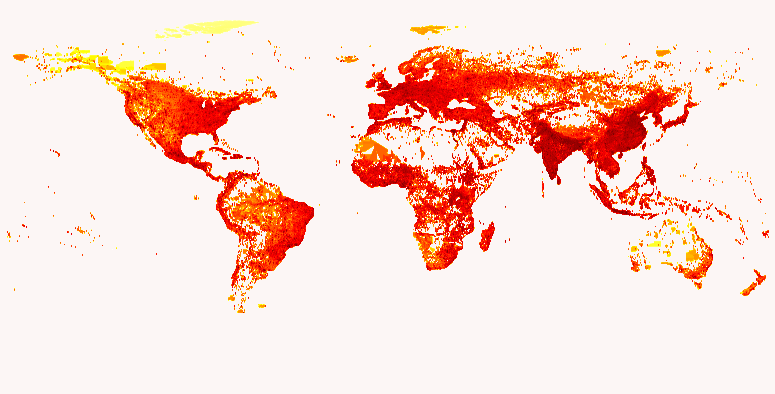

In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(ghs_data[0], norm=colors.LogNorm(), cmap=newcmp)
ax.axis('off')
plt.show()

In [11]:
our_cmap = cm.get_cmap('hot_r', 10)
newcolors = our_cmap(np.linspace(0, 1, 10))
background_colour = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors = np.vstack((background_colour, newcolors))
our_cmap = ListedColormap(newcolors)
bounds = [0.0, 1, 5, 10, 20, 50, 100, 200, 1000, 2000, 10000]
norm = colors.BoundaryNorm(bounds, our_cmap.N)

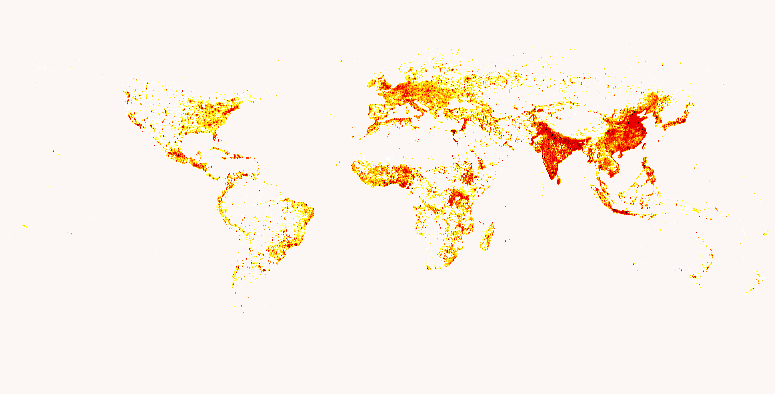

In [12]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(ghs_data[0], norm=norm, cmap=our_cmap)
ax.axis('off')
plt.show()